In [1]:
# importing panda library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

In [6]:
#read txt
df = pd.read_csv('Hospital General Information.csv', encoding='cp1252')
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


<AxesSubplot:>

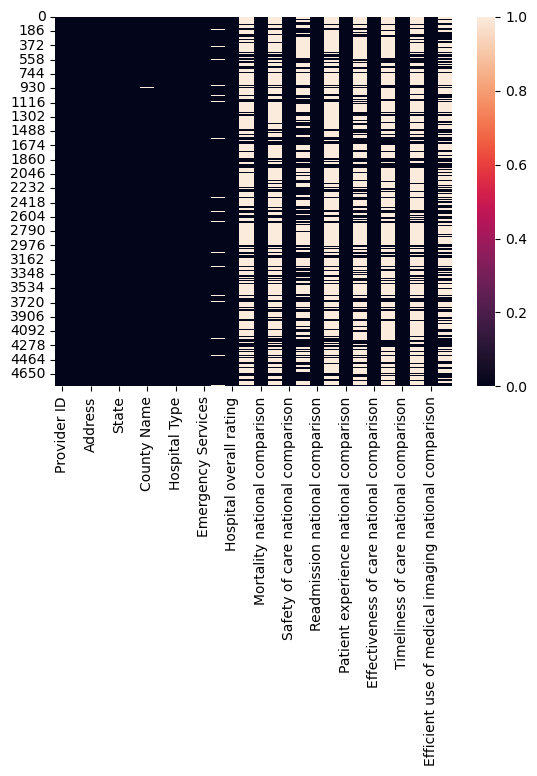

In [7]:
sns.heatmap(df.isnull())

In [8]:
df = df.drop(['Provider ID', 'Hospital Name','Address','Hospital Type','Meets criteria for meaningful use of EHRs',
              'City','State','ZIP Code','County Name','Phone Number',
              'Mortality national comparison footnote','Safety of care national comparison footnote',
              'Hospital overall rating footnote','Readmission national comparison footnote',
              'Patient experience national comparison footnote','Effectiveness of care national comparison footnote',
              'Timeliness of care national comparison footnote','Efficient use of medical imaging national comparison footnote'], axis=1)
df.columns

Index(['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'],
      dtype='object')

### Change all row that contains Not Available as None and drop them as they does not help in this prediction

<AxesSubplot:>

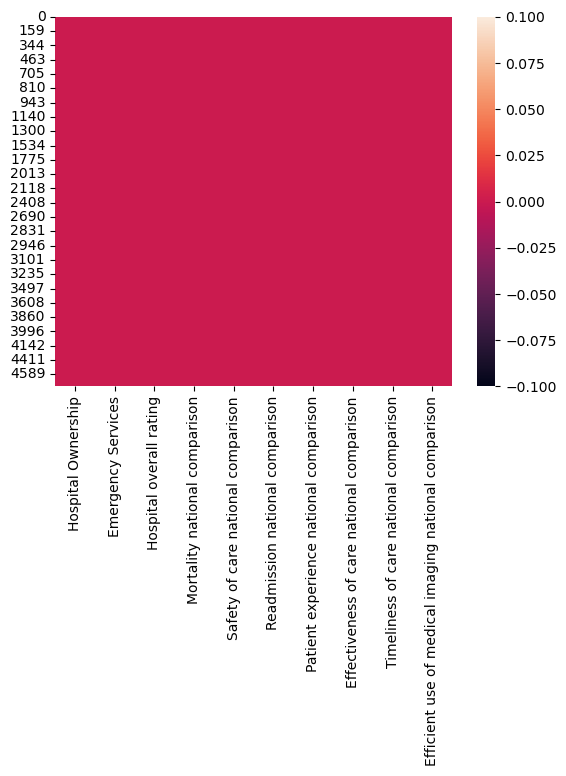

In [10]:
df = df.replace({"Hospital overall rating": {"Not Available": None}, "Mortality national comparison": {"Not Available": None},
                "Safety of care national comparison": {"Not Available": None},"Readmission national comparison": {"Not Available": None},
                "Patient experience national comparison": {"Not Available": None},"Effectiveness of care national comparison": {"Not Available": None},
                 "Timeliness of care national comparison": {"Not Available": None},"Efficient use of medical imaging national comparison": {"Not Available": None}})
df = df.dropna()
df.isna().any()
sns.heatmap(df.isnull())

In [11]:
print(df["Hospital Ownership"].unique())
print(df["Mortality national comparison"].unique())
print(df["Hospital overall rating"].unique())

['Government - Hospital District or Authority'
 'Voluntary non-profit - Private' 'Proprietary' 'Government - State'
 'Government - Local' 'Voluntary non-profit - Church'
 'Government - Federal' 'Voluntary non-profit - Other' 'Physician']
['Same as the national average' 'Below the national average'
 'Above the national average']
['3' '2' '4' '5' '1']


### One-Hot encode all the element

In [12]:
df = df.replace({"Emergency Services": {"No": 0}})
df = df.replace({"Emergency Services": {"Yes": 1}})

df = df.replace({"Mortality national comparison": {"Below the national average": 0},
                 "Safety of care national comparison": {"Below the national average": 0},
                "Readmission national comparison": {"Below the national average": 0},
                "Patient experience national comparison": {"Below the national average": 0},
                "Effectiveness of care national comparison": {"Below the national average": 0},
                "Timeliness of care national comparison": {"Below the national average": 0},
                "Efficient use of medical imaging national comparison": {"Below the national average": 0}})

df = df.replace({"Mortality national comparison": {"Same as the national average": 1},
                 "Safety of care national comparison": {"Same as the national average": 1},
                "Readmission national comparison": {"Same as the national average": 1},
                "Patient experience national comparison": {"Same as the national average": 1},
                "Effectiveness of care national comparison": {"Same as the national average": 1},
                "Timeliness of care national comparison": {"Same as the national average": 1},
                "Efficient use of medical imaging national comparison": {"Same as the national average":1}})

df = df.replace({"Mortality national comparison": {"Above the national average": 2},
                 "Safety of care national comparison": {"Above the national average": 2},
                "Readmission national comparison": {"Above the national average": 2},
                "Patient experience national comparison": {"Above the national average": 2},
                "Effectiveness of care national comparison": {"Above the national average": 2},
                "Timeliness of care national comparison": {"Above the national average": 2},
                "Efficient use of medical imaging national comparison": {"Above the national average": 2}})

df = df.replace({"Hospital Ownership": {"Government - Hospital District or Authority": 1}})
df = df.replace({"Hospital Ownership": {"Government - State": 1}})
df = df.replace({"Hospital Ownership": {"Government - Local": 1}})
df = df.replace({"Hospital Ownership": {"Government - Federal": 1}})
df = df.replace({"Hospital Ownership": {"Voluntary non-profit - Private": 2}})
df = df.replace({"Hospital Ownership": {"Proprietary": 2}})
df = df.replace({"Hospital Ownership": {"Voluntary non-profit - Church": 2}})
df = df.replace({"Hospital Ownership": {"Voluntary non-profit - Other": 2}})
df = df.replace({"Hospital Ownership": {"Physician": 2}})
df.head()

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,1,1,3,1,2,1,0,1,1,1
1,1,1,3,0,1,2,1,1,2,0
2,1,1,2,0,1,1,0,1,2,1
5,2,1,2,1,0,1,0,0,1,1
6,2,1,3,0,1,1,1,1,2,1


In [13]:
df.to_csv('./clean_data.csv',index=False)

## Data Normalization

In [14]:
import sklearn.preprocessing as preprocessing

In [15]:
#resturn the normaliziation of the input df
def normaliziation(df,name):
    x = df[df.columns[:-1]].values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_n = pd.DataFrame(x_scaled, columns= df[df.columns[:-1]].columns)
    df_n = df_n.join(df[name])
    return df_n

In [16]:
df = pd.read_csv('./clean_data.csv')
column = df.pop('Hospital overall rating')
df.insert(9, 'Hospital overall rating', column)

In [17]:
df2 = normaliziation(df,'Hospital overall rating')

In [18]:
df2.to_csv('./ndata.csv',index=False)